In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

## Gathering Data

In [2]:
# Read in csv file as a Pandas DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [3]:
# Use requests library to download tsv file from a website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')   
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [136]:
# My tweet keys
consumer_key = '############'
consumer_secret = '########################################'
access_token = '################################'
access_secret = '##################################'

In [33]:
# create an API object that you can use to gather Twitter data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# For loop that will append each tweet from twitter_archive'tweet_id' to a new line of tweet_json.txt
#json serializable property(._json)
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 463
Rate limit reached. Sleeping for: 738
Rate limit reached. Sleeping for: 738


In [4]:
# For loop to append each tweet from 'tweet_json.txt' into a list
tweets_list = []

tweets_txt = open('tweet_json.txt', "r")

for line in tweets_txt:
    try:
        tweet = json.loads(line)
        tweets_list.append(tweet)
    except:
        continue
        
tweets_txt.close()

In [5]:
# Create tweet_df DataFrame, and append 'retweet_count' and 'favorite_count' to tweet_df DataFrame
tweets_df = pd.DataFrame()
tweets_df['id'] = list(map(lambda tweet: tweet['id'], tweets_list))
tweets_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_list))
tweets_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_list))
tweets_df.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8566,38729
1,892177421306343426,6300,33191
2,891815181378084864,4183,24991
3,891689557279858688,8699,42134
4,891327558926688256,9457,40272
5,891087950875897856,3134,20187
6,890971913173991426,2087,11829
7,890729181411237888,19010,65422
8,890609185150312448,4284,27749
9,890240255349198849,7458,31897


In [6]:
tweets_df[tweets_df.id == 829449946868879360]

,id,retweet_count,favorite_count
354,829449946868879360,2256,11250
1241,829449946868879360,2256,11250
2128,829449946868879360,2256,11250


## Accessing Data

#### twitter_archive

In [7]:
# View the info of twitter_archive DataFrame
twitter_archive.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# View the top 10 rows of twitter_archive DataFrame
twitter_archive.head(10)
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [9]:
# View the last 10 rows of twitter_archive DataFrame
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
# describe twitter_archive DataFrame
twitter_archive.describe()
twitter_archive[twitter_archive.rating_denominator ==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


#### image_predictions

In [11]:
# View info of image_predictions DataFrame
image_predictions.info()
image_predictions.p1_dog.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


True     1532
False     543
Name: p1_dog, dtype: int64

In [12]:
# View top 10 rows of image_predictions DataFrame
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
# View last 10 rows of image_predictions DataFrame
image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
# Describe image_predictions DataFrame
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### tweet_df

In [15]:
# View info of tweets_df DataFrame
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 3 columns):
id                4119 non-null int64
retweet_count     4119 non-null int64
favorite_count    4119 non-null int64
dtypes: int64(3)
memory usage: 96.6 KB


In [16]:
# View top 10 rows of tweet_df DataFrame
tweets_df.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8566,38729
1,892177421306343426,6300,33191
2,891815181378084864,4183,24991
3,891689557279858688,8699,42134
4,891327558926688256,9457,40272
5,891087950875897856,3134,20187
6,890971913173991426,2087,11829
7,890729181411237888,19010,65422
8,890609185150312448,4284,27749
9,890240255349198849,7458,31897


In [17]:
# View last 10 rows of tweet_df DataFrame
tweets_df.tail(10)

,id,retweet_count,favorite_count
4109,666058600524156928,57,112
4110,666057090499244032,142,297
4111,666055525042405380,253,436
4112,666051853826850816,853,1226
4113,666050758794694657,58,132
4114,666049248165822465,41,109
4115,666044226329800704,141,299
4116,666033412701032449,45,125
4117,666029285002620928,47,129
4118,666020888022790149,518,2565


In [18]:
# Describe tweet_df DataFrame
tweets_df.describe()

,id,retweet_count,favorite_count
count,4.119000e+03,4119.000000,4119.000000
mean,7.758010e+17,4008.837582,10931.609614
std,6.875861e+16,5619.649780,14073.667209
min,6.660209e+17,0.000000,0.000000
25%,7.061599e+17,994.000000,1728.000000
50%,7.865960e+17,2418.000000,6712.000000
75%,8.313194e+17,4753.000000,15125.000000
max,8.924206e+17,77200.000000,143124.000000


### Quality Issue

- image_predictions dataset has less observations than twitter_archive, this could be caused by no image tweeting
- source feature needs to be extracted(iphone, vine, webclient, tweetdeck) 
- change timestamp to datetime datatype
- change datatype 'meme'to category; 'tweet_id', 'in_reply_to_status_id', and 'in_reply_to_user_id' to strings
- rating_numerator and rating_denominator have lots of unexpected values
- rating_denominator has one value of 0 that can't be used to calculate rating
- in name,doggo, floofer, pupper, puppo , 'None' value needs to be changed to np.nan
- replace '&amp' in text to '&' 
- contains retweets that we dont want it 
- tweets_df has duplicate data


### Tidiness Issue

- delete 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' retweets columns
- the columns 'doggo', 'floofer', 'pupper', 'puppo' should be in one feature 'meme'
- 'rating_numerator' and 'denominator' should be  in one feature rating rate
- concatenate all three datasets

## Cleaning Data

In [19]:
# Create copies of original DataFrames 
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_df_clean = tweets_df.copy()

### Define


Drop duplicate data in tweets_df 

### Code 

In [20]:
tweets_df_clean = tweets_df_clean.drop_duplicates(subset=['id'], keep = 'first')

### Test


In [21]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 4118
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 73.3 KB


### Define


Create one feature 'meme' using 'doggo', 'floofer', 'pupper', 'puppo' columns, and drop 'doggo', 'floofer', 'pupper', 'puppo' columns

### Code 

In [22]:
twitter_archive_clean.doggo=twitter_archive_clean.doggo.replace('None','')
twitter_archive_clean.floofer=twitter_archive_clean.floofer.replace('None','')
twitter_archive_clean.pupper=twitter_archive_clean.pupper.replace('None','')
twitter_archive_clean.puppo=twitter_archive_clean.puppo.replace('None','')
twitter_archive_clean['meme']=twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)
twitter_archive_clean=twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
twitter_archive_clean.stage=twitter_archive_clean.meme.replace('',np.nan)

### Test


In [23]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,meme
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [24]:
twitter_archive_clean.meme.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: meme, dtype: int64

In [25]:
twitter_archive_clean[twitter_archive_clean.meme == 'floofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,meme
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,floofer
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,floofer
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,floofer
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,floofer
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,floofer
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,floofer
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,floofer
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,floofer
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,floofer


### Define


Concatenate all three datasets

### Code


In [26]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweets_df_clean, left_on='tweet_id',
                                 right_on='id', how='inner')

In [27]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')


In [28]:
twitter_archive_clean = twitter_archive_clean.drop('id', axis=1)

### Test 

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
meme                          2069 non-null object
retweet_count                 2069 non-null int64
favorite_count                2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 no

In [30]:
twitter_archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [31]:
image_predictions_clean[image_predictions_clean.tweet_id == 892420643555336193]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Define


Delete rows with retweet, and delete 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' retweets columns

### Code


In [32]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [33]:
twitter_archive_clean=twitter_archive_clean.drop(['retweeted_status_id',
                                                  'retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

### Test 

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
meme                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  199

### Define


Delete rows where there are no images website

### Code


In [35]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

### Test 

In [36]:
sum(twitter_archive_clean.expanded_urls.isnull())


0

### Define


Extract key words from sources, and change the feature type to 'category'

### Code


In [37]:

twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'WebClient')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [38]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

### Test 

In [39]:
twitter_archive_clean.source.value_counts()

iPhone       1955
WebClient      28
TweetDeck      11
Name: source, dtype: int64

### Define


Replace '&amp' with '&' in text feature

### Code


In [40]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

### Test 

In [41]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define


Change timestamp to datetime datatype

### Code


In [42]:
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)

### Test 

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
meme                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf           

### Define


Change datatype 'meme'to category; 'tweet_id', 'in_reply_to_status_id', and 'in_reply_to_user_id' to strings

### Code


In [44]:
twitter_archive_clean['meme'] = twitter_archive_clean['meme'].astype('category')
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')

### Test 

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
meme                     1994 non-null category
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf      

In [46]:
twitter_archive_clean.tweet_id.value_counts()

675166823650848770    1
744709971296780288    1
868880397819494401    1
710833117892898816    1
667044094246576128    1
680934982542561280    1
705591895322394625    1
709918798883774466    1
708469915515297792    1
739979191639244800    1
704859558691414016    1
857029823797047296    1
686618349602762752    1
701981390485725185    1
781524693396357120    1
703611486317502464    1
841680585030541313    1
805826884734976000    1
680494726643068929    1
669375718304980992    1
749317047558017024    1
671115716440031232    1
670797304698376195    1
717047459982213120    1
751937170840121344    1
667177989038297088    1
834458053273591808    1
666362758909284353    1
828046555563323392    1
683462770029932544    1
                     ..
749774190421639168    1
670786190031921152    1
666430724426358785    1
791406955684368384    1
737826014890496000    1
762471784394268675    1
675845657354215424    1
685667379192414208    1
887517139158093824    1
847157206088847362    1
6740193452117606

### Define


Change  rating_numerator and rating_denominator incorrect values

### Code


In [47]:
pd.set_option('display.max_colwidth', -1)
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
341,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
411,810984652412424192,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
730,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
872,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
920,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
963,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
997,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1018,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1043,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1061,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, & Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [48]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.tweet_id!='810984652412424192']
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]



### Test 

In [49]:
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
341,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
730,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
920,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1018,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1043,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1061,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, & Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1127,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1203,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1375,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1376,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110


### Define


Create new feature rating = rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.
Drop oberservations with ratings > 2.

### Code


In [50]:
twitter_archive_clean['rating']=twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator
twitter_archive_clean=twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

twitter_archive_clean.loc[twitter_archive_clean.rating > 2,['tweet_id','text','rating']]

,tweet_id,text,rating
553,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
609,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
798,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1447,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1791,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [51]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='786709082849828864','rating']=1.0
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='778027034220126208','rating']=1.1
twitter_archive_clean.loc[twitter_archive_clean.tweet_id=='680494726643068929','rating']=1.1
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating < 2]

### Test 

In [52]:
twitter_archive_clean.rating.sort_values()

245     0.0
828     0.0
1808    0.1
1975    0.1
2051    0.1
1592    0.1
1960    0.2
1951    0.2
1492    0.2
2023    0.2
1495    0.2
2062    0.2
1796    0.2
1639    0.2
2039    0.2
1647    0.3
1657    0.3
610     0.3
1428    0.3
1620    0.3
1953    0.3
1665    0.3
1346    0.3
1853    0.3
1560    0.3
1240    0.3
2018    0.3
1917    0.3
1899    0.3
1094    0.3
       ... 
9       1.4
858     1.4
150     1.4
289     1.4
166     1.4
157     1.4
122     1.4
214     1.4
604     1.4
427     1.4
343     1.4
50      1.4
116     1.4
501     1.4
135     1.4
37      1.4
311     1.4
388     1.4
65      1.4
1353    1.4
292     1.4
102     1.4
330     1.4
269     1.4
264     1.4
336     1.4
21      1.4
751     1.4
872     1.4
630     1.4
Name: rating, Length: 1991, dtype: float64

In [67]:
twitter_archive_clean[twitter_archive_clean.rating == 0.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,meme,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
245,835152434251116546,nan,nan,2017-02-24 15:40:31,iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",None,,3332,...,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,0.0
828,746906459439529985,7.46885919388e+17,4196983835.0,2016-06-26 03:22:31,iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,None,,328,...,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False,0.0


In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2068
Data columns (total 23 columns):
tweet_id                 1991 non-null object
in_reply_to_status_id    1991 non-null object
in_reply_to_user_id      1991 non-null object
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null category
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1991 non-null object
meme                     1991 non-null category
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf                  1991 non-null float64
p2_dog                   1991 non-null bool
p3          

## Storing Data

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

In [54]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data 

In [56]:
twitter_archive_clean.describe()

,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03,1991.000000
mean,2708.321949,8828.418885,1.203415,0.594082,1.345157e-01,6.027009e-02,1.055450
std,4682.099001,12548.230424,0.561144,0.271856,1.007215e-01,5.092272e-02,0.217822
min,13.000000,80.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,606.000000,1917.000000,1.000000,0.362880,5.397835e-02,1.614795e-02,1.000000
50%,1305.000000,4025.000000,1.000000,0.587764,1.175660e-01,4.948690e-02,1.100000
75%,3117.000000,11122.500000,1.000000,0.845942,1.953115e-01,9.164355e-02,1.200000
max,77200.000000,143123.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,1.400000


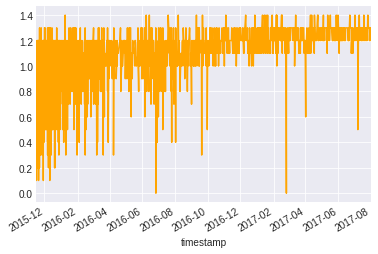

In [135]:
plot_df = twitter_archive_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating']].copy()
plot_df.set_index('timestamp', inplace=True)

plot_df['rating'].plot(color = 'orange', label='c')
plt.show()

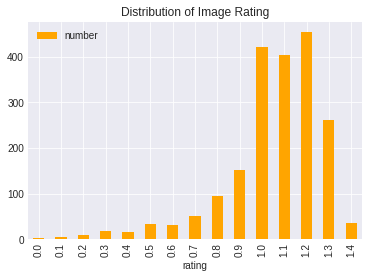

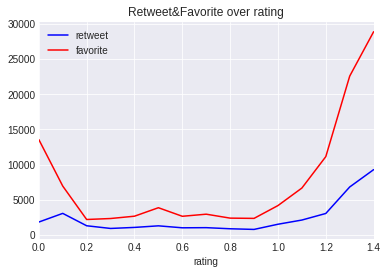

In [83]:
rating_df=pd.DataFrame(columns=['rating','number','retweet','favorite'])
rating_df['rating']= np.sort(twitter_archive_clean.rating.unique())
for x in rating_df['rating']:
    temp_df=twitter_archive_clean[twitter_archive_clean.rating == x]
    rating_df.loc[rating_df.rating==x,'number']=temp_df['tweet_id'].count()
    rating_df.loc[rating_df.rating==x,'retweet']=temp_df.retweet_count.mean()
    rating_df.loc[rating_df.rating==x,'favorite']=temp_df.favorite_count.mean()
rating_df[['rating','number']].plot(x='rating',kind='bar', color = 'orange',title='Distribution of Image Rating')
rating_df[['rating','retweet','favorite']].plot(x='rating',color = ['blue','red'],title='Retweet&Favorite over rating')

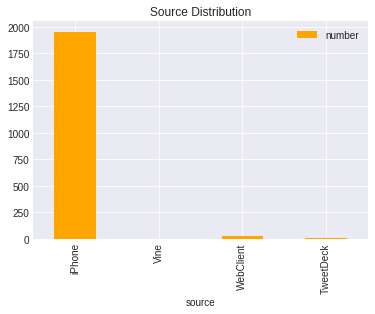

In [134]:

source_df=pd.DataFrame(columns=['source','number'])
source_df['source']=['iPhone','Vine','WebClient','TweetDeck']
for temp_df in source_df.source:
    source_sub=twitter_archive_clean[twitter_archive_clean.source == temp_df]
    source_df.loc[source_df.source == temp_df,'number']=source_sub.shape[0]
source_df[['source','number']].plot(x='source',kind='bar',color = 'orange',title='Source Distribution')

## Insights

- As the time goes by, the average of image rating is increasing. The reason is that tweeters have more experience in how to photo.

- The distribution of image rating is left skewed. Ratings 1.0, 1.1, 1.2 are the most common ratings. Only a few images have very high or very low rating

- Generally, tweeters prefer 'like' to 'share' interesting since the action of liking a post is easier. And people like tweets with extreme rating which means more attractive.

- Most of Tweeters use cellphone to tweet since using mobile to surf the internet is much easier than computer.